In [1]:
import seaborn as sns # 시각화 라이브러리 
import pandas as pd # Dataframe 라이브러리
import numpy as np # 수치계산 라이브러리 

# seaborn 에서 제공하는 기본데이터셋을 불러오겠다. 그 중 'mpg' (연비) 
df = sns.load_dataset('mpg')

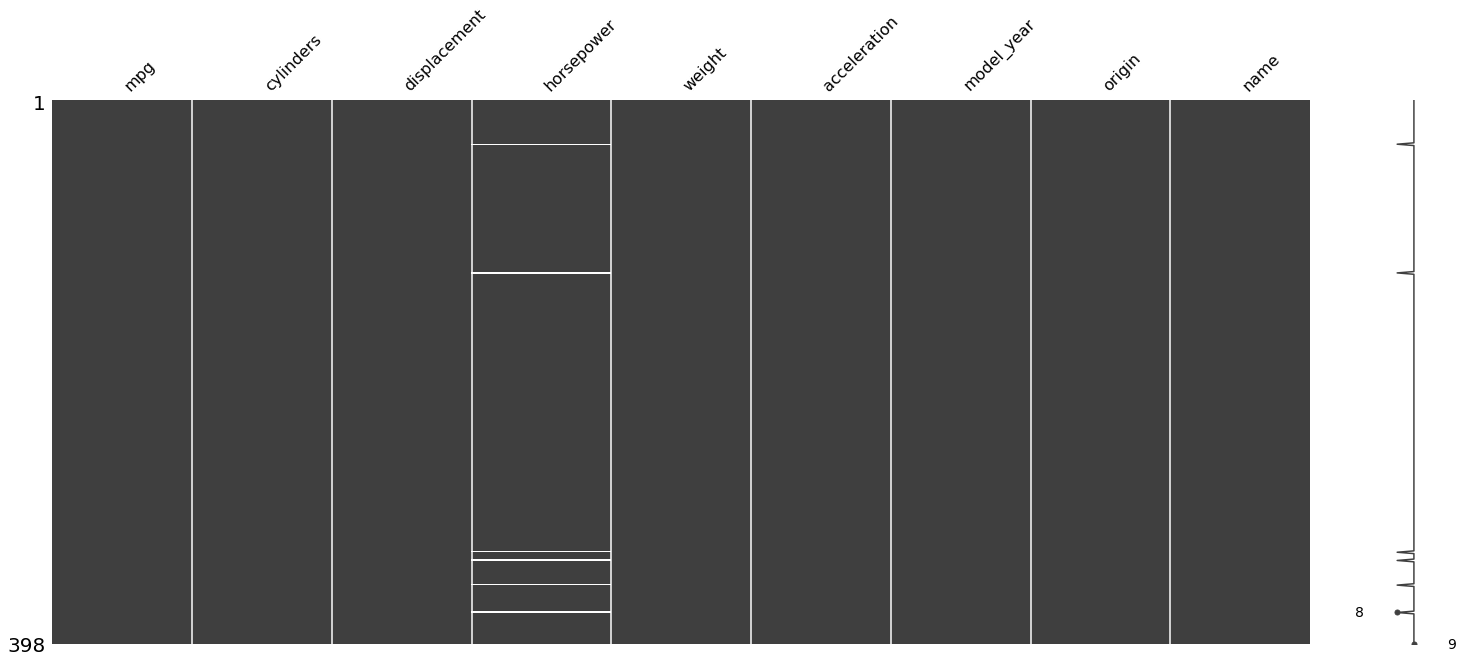

In [4]:
import missingno as msno
msno.matrix(df)

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# horsepower, origin, name

In [7]:
# X, y 설정 
X = df.drop(['horsepower','origin','name','mpg'], axis=1)
y = df['mpg']

In [8]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
alpha_list = [1,2]
l1_ratio_list = [0.1 , 0.2]

In [29]:
for alpha, l1_ratio in zip(alpha_list,l1_ratio_list):
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio ) # 모델 불러오기 
    model.fit(X_train, y_train) # 모델 학습하기 
    y_pred = model.predict(X_test)
    print(f'alpha{alpha}, l1_ratio{l1_ratio},\
          r2 score: {r2_score(y_test, y_pred)}')

alpha1, l1_ratio0.1,          r2 score: 0.8138621942964885
alpha2, l1_ratio0.2,          r2 score: 0.814245803753818


In [24]:
# 엘라스틱 회귀 
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=3.0,l1_ratio=0.4, ) # 모델 불러오기 
model.fit(X_train, y_train) # 모델 학습하기 


ElasticNet(alpha=3.0, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
y_pred = model.predict(X_test)

In [26]:
# 평가 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8128884506292364